In [12]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Load your dataset here (replace 'your_dataset.csv' with your actual dataset file)
# # data = pd.read_csv('AllTogether.csv')
# data = pd.read_csv("AllTogetherNewPP.csv")

# # Assuming 'material_type' is the column that indicates the material type
# X = data.drop(columns=['Material_Type'])
# y = data['Material_Type']

# # Initialize SMOTE with the desired number of samples for each class (e.g., 100)
# desired_samples = 2000
# smote = SMOTE(sampling_strategy={material_type: desired_samples for material_type in y.unique()})

# # Apply SMOTE to the dataset
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check the new class distribution
# print("Class distribution after SMOTE:", Counter(y_resampled))

# # Now you can use X_resampled and y_resampled as your balanced dataset

# # Create a new DataFrame with the resampled data
# resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
# resampled_data['Material_Type'] = y_resampled

# # Save the resampled data to a CSV file
# resampled_data.to_csv('resampled_datasetNewPPFAT.csv', index=False)


Class distribution after SMOTE: Counter({'PE': 2000, 'ALU': 2000, 'PLA': 2000, 'Other': 2000, 'PP': 2000})


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

# Load the dataset
# data = pd.read_csv("AllTogether.csv")
data = pd.read_csv("resampled_datasetNewPPFAT.csv")


# Separate features and labels
X = data.drop(columns=["Material_Type"])
y = data["Material_Type"]


In [6]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into train and test sets (Normal)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=22)

# # Normalize features
# X_train_normalized = (X_train - X_train.min()) / (X_train.max() - X_train.min())
# X_test_normalized = (X_test - X_train.min()) / (X_train.max() - X_train.min())
X_train_normalized = ((X_train - 0) / (8410000 - 0))
X_test_normalized = ((X_test - 0) / (8410000 - 0))

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation="softmax")
])

Epoch 1/500
3/3 [==============================] - 1s 127ms/step - loss: 1.5738 - accuracy: 0.2125 - val_loss: 1.5161 - val_accuracy: 0.2375
Epoch 2/500
3/3 [==============================] - 0s 26ms/step - loss: 1.5045 - accuracy: 0.2406 - val_loss: 1.4635 - val_accuracy: 0.3000
Epoch 3/500
3/3 [==============================] - 0s 21ms/step - loss: 1.4589 - accuracy: 0.3125 - val_loss: 1.4185 - val_accuracy: 0.4688
Epoch 4/500
3/3 [==============================] - 0s 21ms/step - loss: 1.4180 - accuracy: 0.4891 - val_loss: 1.3751 - val_accuracy: 0.4875
Epoch 5/500
3/3 [==============================] - 0s 18ms/step - loss: 1.3705 - accuracy: 0.5078 - val_loss: 1.3214 - val_accuracy: 0.5125
Epoch 6/500
3/3 [==============================] - 0s 22ms/step - loss: 1.3201 - accuracy: 0.5234 - val_loss: 1.2687 - val_accuracy: 0.5250
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 1.2664 - accuracy: 0.5359 - val_loss: 1.2153 - val_accuracy: 0.5375
Epoch 8/500
3/3 [==

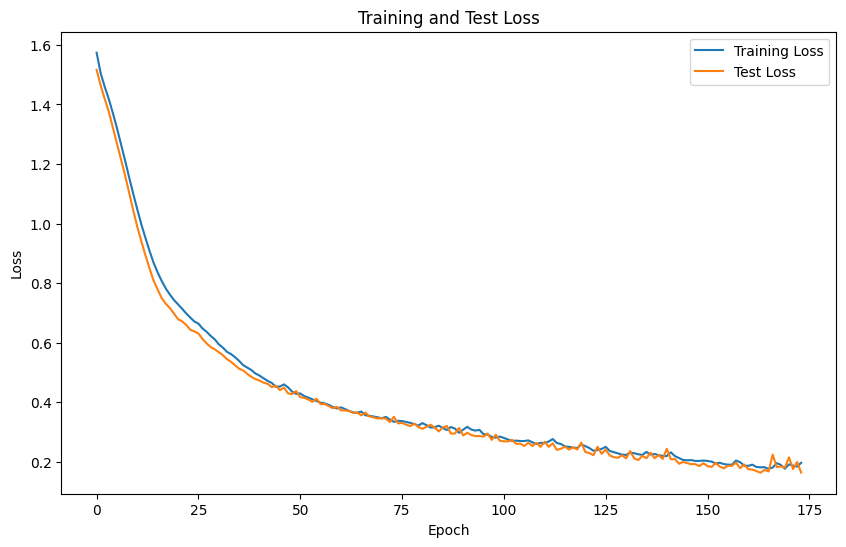

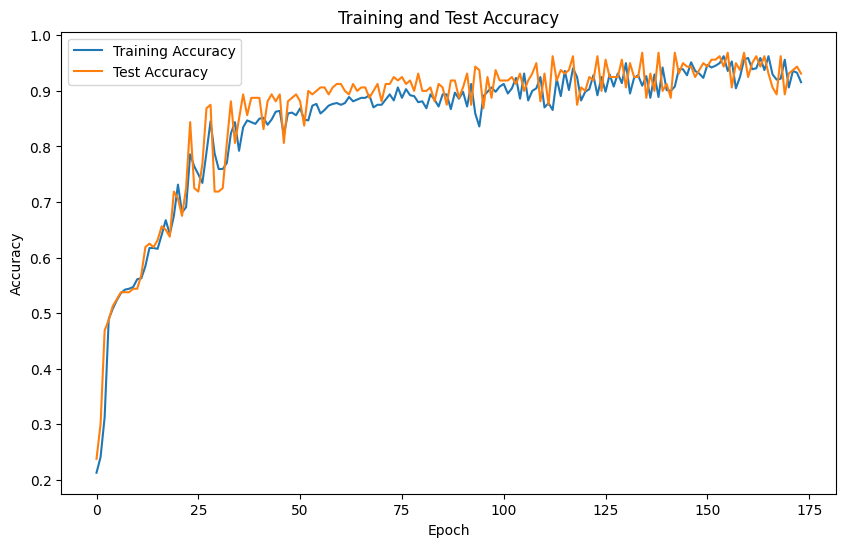

In [7]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,          # Wait for 10 epochs without improvement
    min_delta=0.001,      # Minimum change required to consider an improvement
    verbose=1,            # Print messages about early stopping
    restore_best_weights=True
)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_normalized, y_train, epochs=500, batch_size=256, validation_split=0.2, callbacks=[early_stopping])
# history = model.fit(X_train_normalized, y_train, epochs=500, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test)

# Save the model
# model.save("15_point_plastic_classifier_model.keras")
model.save("15_point_plastic_classifier_model_NewPP.keras")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()



In [8]:
# Make predictions
predictions = model.predict(X_test_normalized)
predicted_labels = np.argmax(predictions, axis=1)
predicted_plastic_types = label_encoder.inverse_transform(predicted_labels)



# Convert predictions to percentage likelihood
percentage_likelihood = predictions.max(axis=1) * 100

# Display test accuracy and example predictions
print(f"Test Accuracy: {test_accuracy}")
for i in range(15):
    if y_test[i] == predicted_labels[i]:
        CorF = "Correct"
    else:
        CorF = "False"
    print(f"Sample {i+1}: {CorF} Predicted {predicted_plastic_types[i]} with {percentage_likelihood[i]:.2f}% likelihood")




total_params = model.count_params()
total_size_bytes = total_params * 4  # Each parameter is usually a 32-bit float
total_size_mb = total_size_bytes / (1024)  # Convert bytes to megabytes

print(f"Total size of the model: {total_size_mb:.2f} KB")


7/7 [==============================] - 0s 1ms/step
Test Accuracy: 0.9350000023841858
Sample 1: Correct Predicted PP with 64.61% likelihood
Sample 2: Correct Predicted Other with 99.57% likelihood
Sample 3: Correct Predicted PLA with 95.28% likelihood
Sample 4: Correct Predicted PE with 56.74% likelihood
Sample 5: Correct Predicted ALU with 99.91% likelihood
Sample 6: Correct Predicted ALU with 99.14% likelihood
Sample 7: Correct Predicted ALU with 99.84% likelihood
Sample 8: Correct Predicted PP with 82.66% likelihood
Sample 9: Correct Predicted PP with 82.08% likelihood
Sample 10: Correct Predicted PP with 77.64% likelihood
Sample 11: False Predicted PP with 60.76% likelihood
Sample 12: Correct Predicted PP with 85.86% likelihood
Sample 13: Correct Predicted PE with 74.69% likelihood
Sample 14: Correct Predicted Other with 90.49% likelihood
Sample 15: Correct Predicted Other with 99.93% likelihood
Total size of the model: 278.02 KB


In [9]:
# Make predictions
predictions = model.predict(X_test_normalized)

# Get the top 4 predictions for each sample
top_predictions = np.argsort(predictions, axis=1)[:, -4:]
top_labels = top_predictions[:, ::-1]

# print(predictions)

# Reshape the top_labels array to be 1D
top_labels_1d = top_labels.reshape(-1)

# Inverse transform the labels
top_plastic_types = label_encoder.inverse_transform(top_labels_1d)

# Reshape the top_plastic_types array back to 2D
top_plastic_types = top_plastic_types.reshape(top_labels.shape)

# Get the percentage likelihoods for the top 4 predictions
percentage_likelihoods = np.take_along_axis(predictions, top_predictions, axis=1) * 100

# Display test accuracy and example predictions
print(f"Test Accuracy: {test_accuracy}")
for i in range(len(predicted_labels)):
    num_predictions = min(4, len(np.unique(top_labels[i])))
    if y_test[i] == predicted_labels[i]:
        CorF = "Correct,"
    else:
        CorF = "False,"
    print(f"Sample {i+1}: {CorF} it was {label_encoder.classes_[y_test[i]]}")
    for j in range(num_predictions):
        print(f"  Prediction {j+1}: {top_plastic_types[i][j]} with {percentage_likelihoods[i][3-j]:.2f}% likelihood")

1/7 [===>..........................] - ETA: 0s

7/7 [==============================] - 0s 2ms/step
Test Accuracy: 0.9350000023841858
Sample 1: Correct, it was PP
  Prediction 1: PP with 64.61% likelihood
  Prediction 2: PE with 35.30% likelihood
  Prediction 3: PLA with 0.06% likelihood
  Prediction 4: Other with 0.03% likelihood
Sample 2: Correct, it was Other
  Prediction 1: Other with 99.57% likelihood
  Prediction 2: ALU with 0.29% likelihood
  Prediction 3: PE with 0.13% likelihood
  Prediction 4: PLA with 0.00% likelihood
Sample 3: Correct, it was PLA
  Prediction 1: PLA with 95.28% likelihood
  Prediction 2: PE with 4.47% likelihood
  Prediction 3: Other with 0.25% likelihood
  Prediction 4: PP with 0.01% likelihood
Sample 4: Correct, it was PE
  Prediction 1: PE with 56.74% likelihood
  Prediction 2: PP with 41.80% likelihood
  Prediction 3: PLA with 1.35% likelihood
  Prediction 4: Other with 0.11% likelihood
Sample 5: Correct, it was ALU
  Prediction 1: ALU with 99.91% likelihood
  Prediction 2: Other with 0.09% likelihood

In [10]:
# Get manual input from the user
manual_input = np.array([[1365889,2383139,3943193,6364119,6459881,3520279,1572135,859381,1734251,3039005,5108675,6392189,4980199,2559117,1249619]])  # Replace with your input values

# Normalize the manual input if needed
normalized_manual_input = ((manual_input - 0) / (8388608 - 0))

# Make predictions on manual input
predictions = model.predict(normalized_manual_input)
print(predictions)

# Get the top prediction
top_prediction = np.argmax(predictions)
print(top_prediction)

top_plastic_type = label_encoder.inverse_transform([top_prediction])[0]
print(top_plastic_type)
likelihood = predictions[0][top_prediction] * 100

# Display the prediction for manual input
print(f"Manual Input Prediction:")
print(f"  Prediction: {top_plastic_type} with {likelihood:.2f}% likelihood")

1/1 [==============================] - 0s 50ms/step
[[3.7508350e-08 9.3842234e-04 2.7768186e-01 7.0397183e-02 6.5098250e-01]]
4
PP
Manual Input Prediction:
  Prediction: PP with 65.10% likelihood


In [11]:
# Make predictions from manual
manual_input = np.array([[1365889,2383139,3943193,6364119,6459881,3520279,1572135,859381,1734251,3039005,5108675,6392189,4980199,2559117,1249619
]])

# Calculate the column-wise min and max values from your original dataset
min_values = [74296, 1151721, 2379300, 2748695, 3681840, 1997402, 1742243, 942818, 392145, 795677, 1406647, 2482140, 2630495, 1748806, 1249297]
max_values = [1773075, 3755206, 7787954, 8401566, 8405071, 8401566, 7232265, 8185313, 2080604, 4455589, 8402979, 8405071, 8405071, 8403086, 6084492]

# Convert the lists to numpy arrays
min_values = np.array(min_values)
max_values = np.array(max_values)

# Normalize the manual input using the calculated min and max values
normalized_manual_input = (manual_input - min_values) / (max_values - min_values)
# normalized_manual_input = np.array([[0.85611,0.63202,0.53239,0.41068,0.59174,0.39869,0.44654,0.42188,0.8826042,0.67470967,0.34701898,0.42024683,0.34977269,0.16862726,0.1471771]])

print(normalized_manual_input)

predictions = model.predict(normalized_manual_input)
predicted_labels = np.argmax(predictions, axis=1)
predicted_plastic_types = label_encoder.inverse_transform(predicted_labels)

    
## Calculate the percentage likelihoods
percentage_likelihoods = predictions * 100

# Get the indices of the top 4 predicted classes based on percentage likelihoods
top_indices = np.argsort(percentage_likelihoods[0])[::-1][:4]

# Get the labels for the top predicted classes
top_labels = label_encoder.inverse_transform(top_indices)

# Get the predicted label
predicted_label = top_labels[0]

# Get the true label from the original data (replace with your true label)
true_label = 'ALU'  # Replace with the true label

# Calculate the accuracy
if predicted_label == true_label:
    accuracy = "Correct"
else:
    accuracy = "False"

# Print the prediction, label, and accuracy
print(f"Predicted label: {predicted_label}")
print(f"True label: {true_label}")
print(f"Accuracy: {accuracy}")

# Print the percentages for each type
for label, likelihood in zip(top_labels, percentage_likelihoods[0][top_indices]):
    print(f"{label}: {likelihood:.2f}% likelihood")

[[ 7.60306667e-01  4.72988321e-01  2.89146431e-01  6.39573059e-01
   5.88165389e-01  2.37794816e-01 -3.09849396e-02 -1.15204774e-02
   7.94870352e-01  6.12945885e-01  5.29138411e-01  6.60154407e-01
   4.06905026e-01  1.21772904e-01  6.65950391e-05]]
1/1 [==============================] - 0s 21ms/step
Predicted label: PE
True label: ALU
Accuracy: False
PE: 95.33% likelihood
Other: 4.64% likelihood
PP: 0.03% likelihood
PLA: 0.00% likelihood
